<a href="https://colab.research.google.com/github/santhoshipola/Project-intern/blob/master/Twitter_edited_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Classify whether the tweet is positive or negative**

##Problem statement:
Classify tweets from the datasets as either as positive or negative using three different
Machine Learning Algorithms.
They are:
1. NAIVE BAYES ALGORITHM
2. LOGISTIC REGRESSION
3. DECISION TREE CLASSIFIER

  To implement an algorithm for automatic classification of text into positive and
negative. By this we can determine the attitude of the mass is positive or negative towards
the point of interest.
 80% of consumers get advice on products from social media. Twitter sentiment
analysis allows you to keep track of what's being said about your product or service on
social media and can help you detect angry customers or negative mentions before they
turn into a major crisis.That is,it helps us in social media monitoring.


###Preprocessing the data:

In [ ]:
#Importing the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading the training dataset
info = pd.read_csv("/content/drive/My Drive/2020/train.csv",encoding = 'latin-1')
info

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
#Finding the count of values in label column
info.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

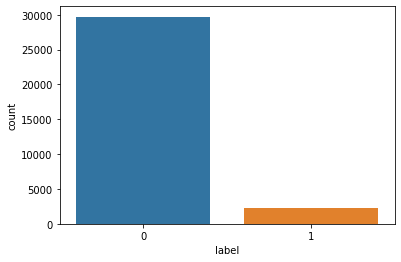

In [ ]:
#countplot for label column
sns.countplot(info.label)

In [ ]:
#Dropping the rows that have Nan values
info.dropna()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
#Finding the shape of csv file
info.shape

(31962, 3)

###Data Selection:

In [ ]:
#Dropping the unnecessary columns
info.drop(['id'],axis = 1,inplace = True)

In [ ]:
#Dataset after dropping unnecessary column
info

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
#Assigning the tweet column to X_train
X_train = info.tweet

In [ ]:
#Assigning the label column to y_train
y_train = info.label

In [ ]:
#Finding the shape of X_train and y_train
print(X_train.shape)
print(y_train.shape)

(31962,)
(31962,)


###Cleaning the train data with nltk:

In [ ]:
#Removing Stopwords which are not required as they are frequently repeated
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words("english")
stop.extend(["i'm","I'm"])

info.tweet=info.tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
info.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,label,tweet
0,0,@user father dysfunctional selfish drags kids ...
1,0,@user @user thanks #lyft credit can't use caus...
2,0,bihday majesty
3,0,#model love u take u time urÃ°ÂÂÂ±!!! Ã°ÂÂ...
4,0,factsguide: society #motivation


In [ ]:
#Cleaning the data
def clean(x):
    x=' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z0-9']+)|(\w+:\/\/\S+)"," ",x).split())
    return x

In [ ]:
# Removing Hyperlinks, userIDS
import re
info.tweet = info.tweet.apply(clean)
info

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,user thanks lyft credit can't use cause offer ...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation
...,...,...
31957,0,ate user isz youuu
31958,0,see nina turner airwaves trying wrap mantle ge...
31959,0,listening sad songs monday morning otw work sad
31960,1,sikh temple vandalised calgary wso condemns act


In [ ]:
# Applying Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
wnl = WordNetLemmatizer()
info.tweet=info.tweet.apply(lambda x:' '.join([wnl.lemmatize(word,'v') for word in x.split()])) # v stands for verb
info.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,label,tweet
0,0,father dysfunctional selfish drag kid dysfunct...
1,0,user thank lyft credit can't use cause offer w...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation


In [ ]:
#Converting all letters to single case
info.tweet=info.tweet.apply(lambda x:' '.join([word.lower() for word in x.split()]))
info

,label,tweet
0,0,father dysfunctional selfish drag kid dysfunct...
1,0,user thank lyft credit can't use cause offer w...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation
...,...,...
31957,0,eat user isz youuu
31958,0,see nina turner airwaves try wrap mantle genui...
31959,0,listen sad songs monday morning otw work sad
31960,1,sikh temple vandalise calgary wso condemn act


###Preprocessing,Data selecting  and Cleaning the testing data:

In [ ]:
testdata = pd.read_csv("/content/drive/My Drive/2020/test.csv",encoding = 'latin - 1')#Reading the test data 
testdata

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid Ã°ÂÂÂ #hairflip #nev...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [ ]:
testdata.drop(['id'],axis = 1 ,inplace = True)#Dropping the unnecessary columns 
testdata

,tweet
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone to s...
2,safe ways to heal your #acne!! #altwaystohe...
3,is the hp and the cursed child book up for res...
4,"3rd #bihday to my amazing, hilarious #nephew..."
...,...
17192,thought factory: left-right polarisation! #tru...
17193,feeling like a mermaid Ã°ÂÂÂ #hairflip #nev...
17194,#hillary #campaigned today in #ohio((omg)) &am...
17195,"happy, at work conference: right mindset leads..."


In [ ]:
#Removing Stopwords which are not required as they are frequently repeated
import nltk
nltk.download('stopwords')
stop=stopwords.words("english")
stop.extend(["i'm","I'm"])
testdata.tweet=testdata.tweet.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
testdata


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,tweet
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone see n...
2,safe ways heal #acne!! #altwaystoheal #healthy...
3,hp cursed child book reservations already? yes...
4,"3rd #bihday amazing, hilarious #nephew eli ahm..."
...,...
17192,thought factory: left-right polarisation! #tru...
17193,feeling like mermaid Ã°ÂÂÂ #hairflip #never...
17194,#hillary #campaigned today #ohio((omg)) &amp; ...
17195,"happy, work conference: right mindset leads cu..."


In [ ]:
#Cleaning the data
def clean(x):
    x=' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z0-9']+)|(\w+:\/\/\S+)"," ",x).split())
    return x

In [ ]:
# Removing Hyperlinks, userIDS
testdata.tweet = testdata.tweet.apply(clean)
testdata

,tweet
0,studiolife aislife requires passion dedication...
1,white supremacists want everyone see new birds...
2,safe ways heal acne altwaystoheal healthy healing
3,hp cursed child book reservations already yes ...
4,3rd bihday amazing hilarious nephew eli ahmir ...
...,...
17192,thought factory left right polarisation trump ...
17193,feeling like mermaid hairflip neverready forma...
17194,hillary campaigned today ohio omg amp used wor...
17195,happy work conference right mindset leads cult...


In [ ]:
testdata.tweet=testdata.tweet.apply(lambda x:' '.join([wnl.lemmatize(word,'v') for word in x.split()])) #Applying lementization
testdata

,tweet
0,studiolife aislife require passion dedication ...
1,white supremacists want everyone see new bird ...
2,safe ways heal acne altwaystoheal healthy heal
3,hp curse child book reservations already yes w...
4,3rd bihday amaze hilarious nephew eli ahmir un...
...,...
17192,think factory leave right polarisation trump u...
17193,feel like mermaid hairflip neverready formal w...
17194,hillary campaign today ohio omg amp use word l...
17195,happy work conference right mindset lead cultu...


In [ ]:
#converting all letters to same case
testdata.tweet=testdata.tweet.apply(lambda x:' '.join([word.lower() for word in x.split()]))
testdata

,tweet
0,studiolife aislife require passion dedication ...
1,white supremacists want everyone see new bird ...
2,safe ways heal acne altwaystoheal healthy heal
3,hp curse child book reservations already yes w...
4,3rd bihday amaze hilarious nephew eli ahmir un...
...,...
17192,think factory leave right polarisation trump u...
17193,feel like mermaid hairflip neverready formal w...
17194,hillary campaign today ohio omg amp use word l...
17195,happy work conference right mindset lead cultu...


In [ ]:
X_test = testdata.tweet#Assigning tweet column to X_test

###Reading the result data:


In [ ]:
#Reading the result data
result = pd.read_csv("/content/drive/My Drive/2020/result.csv")
result

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0
...,...,...
17192,49155,1
17193,49156,0
17194,49157,0
17195,49158,0


In [ ]:
#Assigning the label column to y_test
y_test = result.label

###Applying TFIDF Vectorizer for training and testing data: 

In [ ]:
#Import TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#Initialize an object for the TFIDF Vectorizer
tfidf = TfidfVectorizer()

In [ ]:
#Apply the tfidf to the train data(X_train)
X_train_new= tfidf.fit_transform(X_train)
X_train_new

<31962x35865 sparse matrix of type '<class 'numpy.float64'>'
	with 253455 stored elements in Compressed Sparse Row format>

In [ ]:
##Apply the tfidf to the test data(X_test)
X_test_new = tfidf.transform(testdata.tweet)
X_test_new

<17197x35865 sparse matrix of type '<class 'numpy.float64'>'
	with 123657 stored elements in Compressed Sparse Row format>

###Naive-Bayes Algorithm:

In [ ]:
#Import BerNB
from sklearn.naive_bayes import BernoulliNB

#Creating an object for BerNB
model_BernNB = BernoulliNB()

In [ ]:
#Applying the Algorithm
model_BernNB.fit(X_train_new,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [ ]:
#Prediction on train data
y_train_pred = model_BernNB.predict(X_train_new)
y_train_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
#Prediction on Test Data
y_test_pred = model_BernNB.predict(X_test_new)
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Classification report on train and test data
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_train,y_train_pred))
print('_________________________________________________________')
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     29720
           1       0.97      0.38      0.55      2242

    accuracy                           0.96     31962
   macro avg       0.97      0.69      0.76     31962
weighted avg       0.96      0.96      0.95     31962

_________________________________________________________
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     16282
           1       0.83      0.27      0.41       915

    accuracy                           0.96     17197
   macro avg       0.89      0.63      0.69     17197
weighted avg       0.95      0.96      0.95     17197



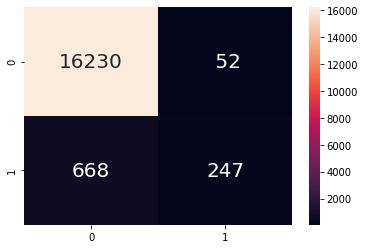

In [ ]:
#Heat map of Naive-Bayes Algorithm
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot = True,fmt = '3.0f',annot_kws={'size':'20'})

In [ ]:
 #Finding Accuracy score
 from sklearn.metrics import accuracy_score
 accuracy_score(y_test,y_test_pred)

0.9581322323661103

In [ ]:
#Finding roc_auc_score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_test_pred)

0.6333758221724617

###Logistic Regression:

In [ ]:
#Importing and applying the algorithm
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train_new,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#predicting on training data
L_train_pred=reg.predict(X_train_new)
L_train_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
#predicting on testing data
L_test_pred=reg.predict(X_test_new)
L_test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Classification report on training and testing data
from sklearn.metrics import classification_report
print(classification_report(y_train,L_train_pred))
print('______________________________________________________')
print(classification_report(y_test,L_test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     29720
           1       0.96      0.39      0.55      2242

    accuracy                           0.96     31962
   macro avg       0.96      0.69      0.76     31962
weighted avg       0.96      0.96      0.95     31962

______________________________________________________
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     16282
           1       0.93      0.49      0.64       915

    accuracy                           0.97     17197
   macro avg       0.95      0.75      0.81     17197
weighted avg       0.97      0.97      0.97     17197



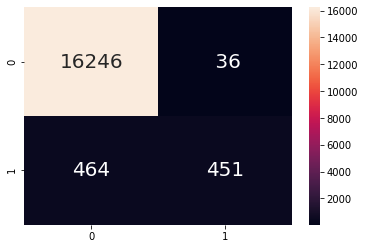

In [ ]:
#Heat map of Linear Regression
sns.heatmap(confusion_matrix(y_test,L_test_pred),annot = True,fmt = '3.0f',annot_kws={'size':'20'})

In [ ]:
#Finding the accuracy acore of Linear regression
from sklearn.metrics import accuracy_score
accuracy_score(y_test,L_test_pred)

0.9709251613653544

In [ ]:
#Finding the roc_auc_score
roc_auc_score(y_test,L_test_pred)

0.7453425721387325

###Decision Tree Classifier:

In [ ]:
# Apply the Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier

#Initailization of object
dtree = DecisionTreeClassifier()

# Applying the classifier to the dataset
dtree.fit(X_train_new, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Predict on training data
D_train_pred = dtree.predict(X_train_new)
D_train_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# Prediction on testing data
D_test_pred =  dtree.predict(X_test_new) 
D_test_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# Classification report on training and testing data
print(classification_report(y_train,D_train_pred))
print('______________________________________________________')
print(classification_report(y_test,D_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29720
           1       1.00      1.00      1.00      2242

    accuracy                           1.00     31962
   macro avg       1.00      1.00      1.00     31962
weighted avg       1.00      1.00      1.00     31962

______________________________________________________
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     16282
           1       0.48      0.63      0.55       915

    accuracy                           0.94     17197
   macro avg       0.73      0.80      0.76     17197
weighted avg       0.95      0.94      0.95     17197



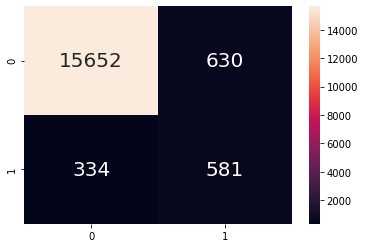

In [ ]:
#Heat map of Decision tree algorithm
sns.heatmap(confusion_matrix(y_test,D_test_pred),annot = True,fmt = '3.0f',annot_kws={'size':'20'})

In [ ]:
 #Finding the accuracy score of Decision  tree algorithm
 from sklearn.metrics import accuracy_score
 accuracy_score(y_test,D_test_pred)

0.9439437111124033

In [ ]:
#Finding the roc_auc_score
roc_auc_score(y_test,D_test_pred)

0.798139821170987

###Best among Naive-Bayes,Logistic Regression and Decision Tree Classifier:


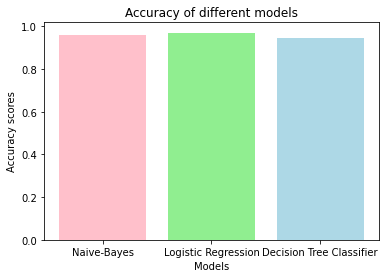

In [ ]:
#Plot of accuracies
models = ['Naive-Bayes','Logistic Regression','Decision Tree Classifier']
acc_scores = [0.9583648310751876,0.970634412979008,0.9441763098214805]
plt.bar(models,acc_scores,color=['pink','lightgreen','lightblue'])
plt.ylabel("Accuracy scores")
plt.xlabel("Models")
plt.title("Accuracy of different models")
plt.show()

###Plot of different methods w.r.t roc_auc_score:

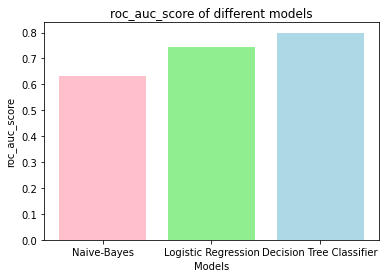

In [ ]:
#Plot of roc_auc_scoes
models = ['Naive-Bayes','Logistic Regression','Decision Tree Classifier']
roc_auc_score = [0.633375822172461,0.7453425721387325,0.7992760452220864]
plt.bar(models,roc_auc_score,color=['pink','lightgreen','lightblue'])
plt.ylabel("roc_auc_score")
plt.xlabel("Models")
plt.title("roc_auc_score of different models")
plt.show()


###Conclusion:
Twitter Sentiment Analysis allows a deeper understanding of how your
customers feel.. It adds an extra layer to the traditional metrics used to analyze the
performance of brands on social media and provides businesses with powerful
opportunities.
